In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from param.ipython import green
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import scipy
from scipy import stats
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.models import load_model
import os
from keras import regularizers
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import pydot

#importing of all necessary libraries


In [3]:
data = pd.read_csv('Student_performance_data _.csv')
#loads data from csv file into a pandas dataframe

In [4]:
data.head()
#displays data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0



** INFO
- gender 0 = male, 1 = female
- parental education none 0 -> 4 higher
- ethnicitiy 0= caucasian, 1=african american, 2=asian, 3=other
- tutoring, extracurricular, sports, music (activity), volunteering: 0=no, 1=yes
- parentalsupport 0=none -> 4=very high

In [5]:
print(data.isnull().sum()) 
#data already has no null values so no row dropping/ column mean calculating is required to clean the data

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [6]:
data.info()
data.describe()
#Used to see info on the dataset, we have 2392 entries for the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


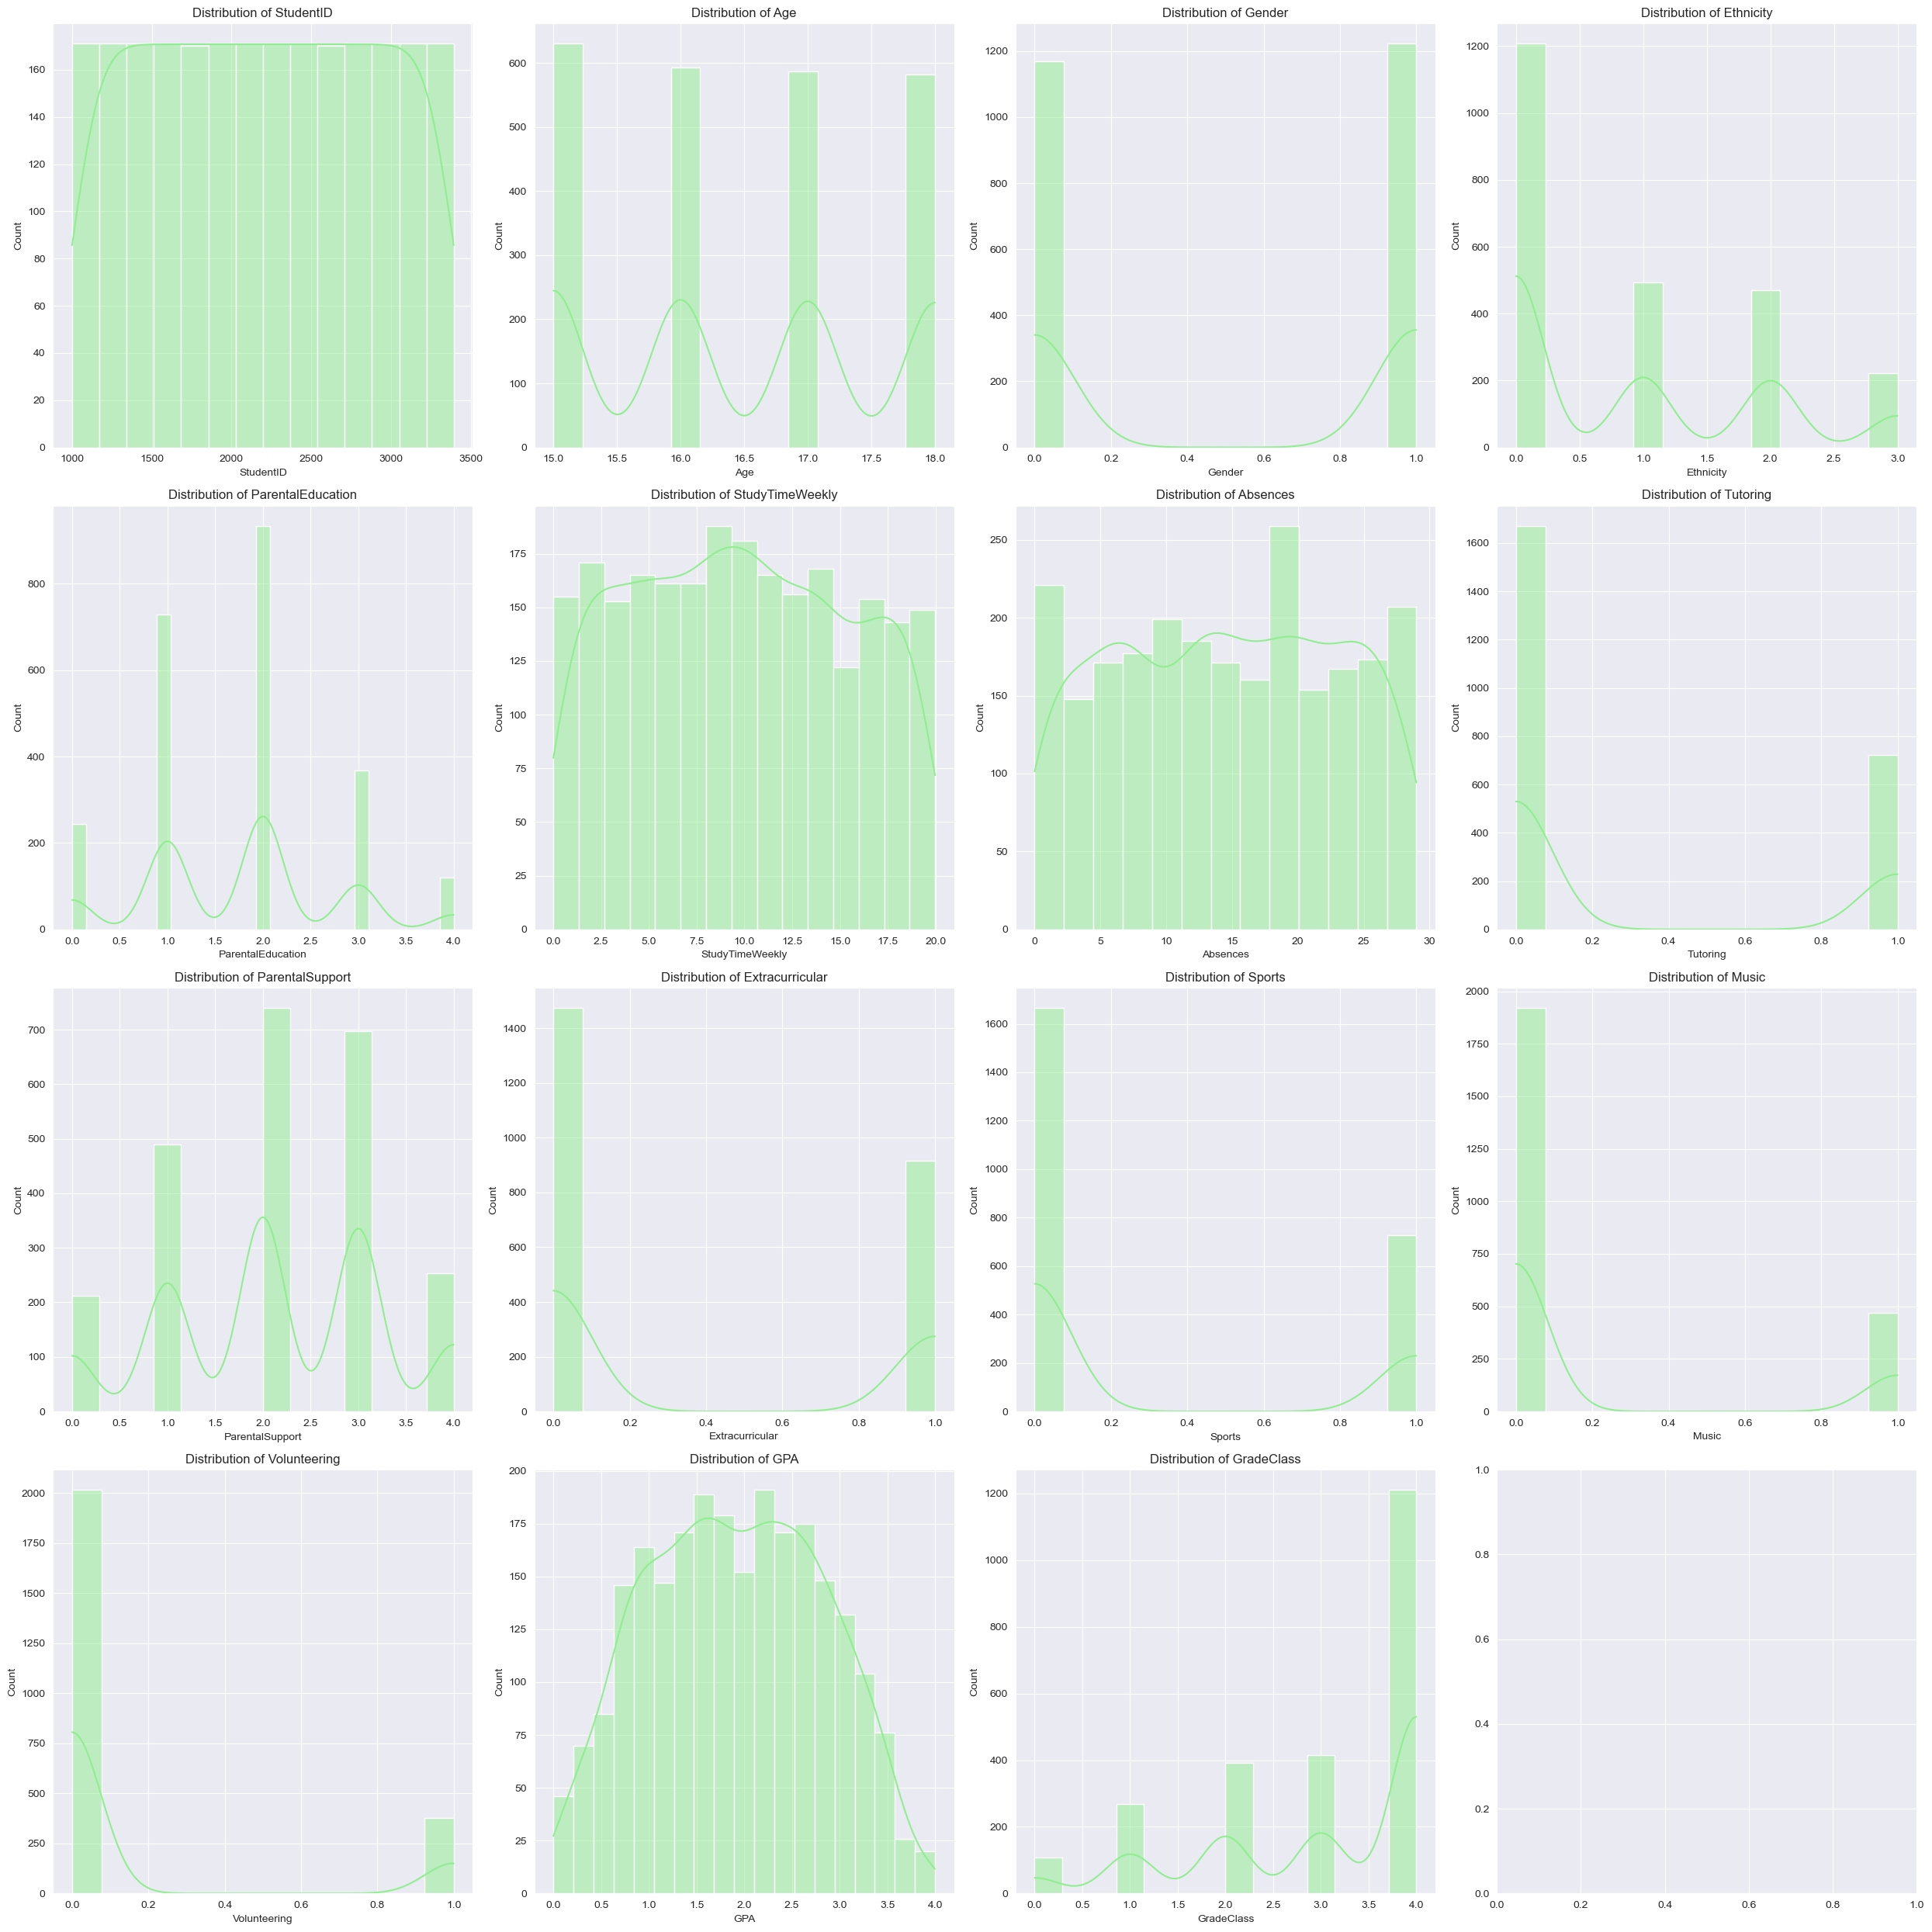

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(25, 25)) #sets a 4,4 figure 
axes = axes.flatten()# reformats the axes to be in a list, making them iteratable in code
print(axes)

i=0

#creates histoplots to display distributions for each of the features
for column in data.columns:
    sns.histplot(data[column], kde=True, color='lightgreen', ax=axes[i])
    axes[i].set_title("Distribution of " +str(column))
    i += 1

#displays the plots
plt.tight_layout()
plt.show()

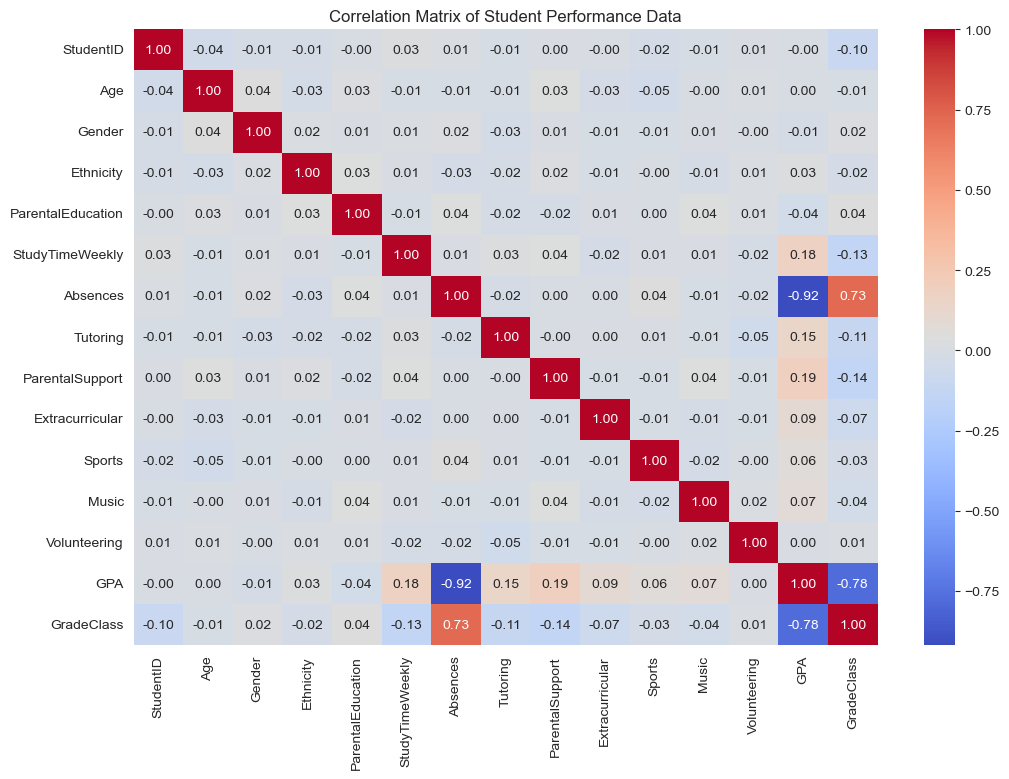

In [8]:
#plots a correlation matrix to see how each data point affects the other. Specifically focusing on grade class

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Student Performance Data")
plt.show()


- Establishes a correlation matrix to see the correlation between each of the features wth each other. Thisll help narrow down which features have the greatest contribution to predicting grade class.

- Notes: A=0 - E=5, The lower the grade class the better it is, so the higher the GPA, the lower the grade class. 

- Anything that increases Grade class is a negative influence, anything that decreases grade class (negative number) is a positive influence

In [16]:
#dropping collumns that should not be considered in the prediction
data = data.drop(columns=['StudentID', 'Age', 'Gender', 'Ethnicity', 'GPA' ]) 
data.head()

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,19.833723,7,1,2,0,0,1,0,2.0
1,1,15.408756,0,0,1,0,0,0,0,1.0
2,3,4.210570,26,0,2,0,0,0,0,4.0
3,3,10.028829,14,0,3,1,0,0,0,3.0
4,2,4.672495,17,1,3,0,0,0,0,4.0


- Drops columns that would cause the AI to create a bias based on traits that shouldn't be taken into account. or in the case of studentID somehow having a correlation with improving the grade class.

- GPA is dropped as grade class is determined solely by it, we want to find how other attributes impact the grade class.

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: >]


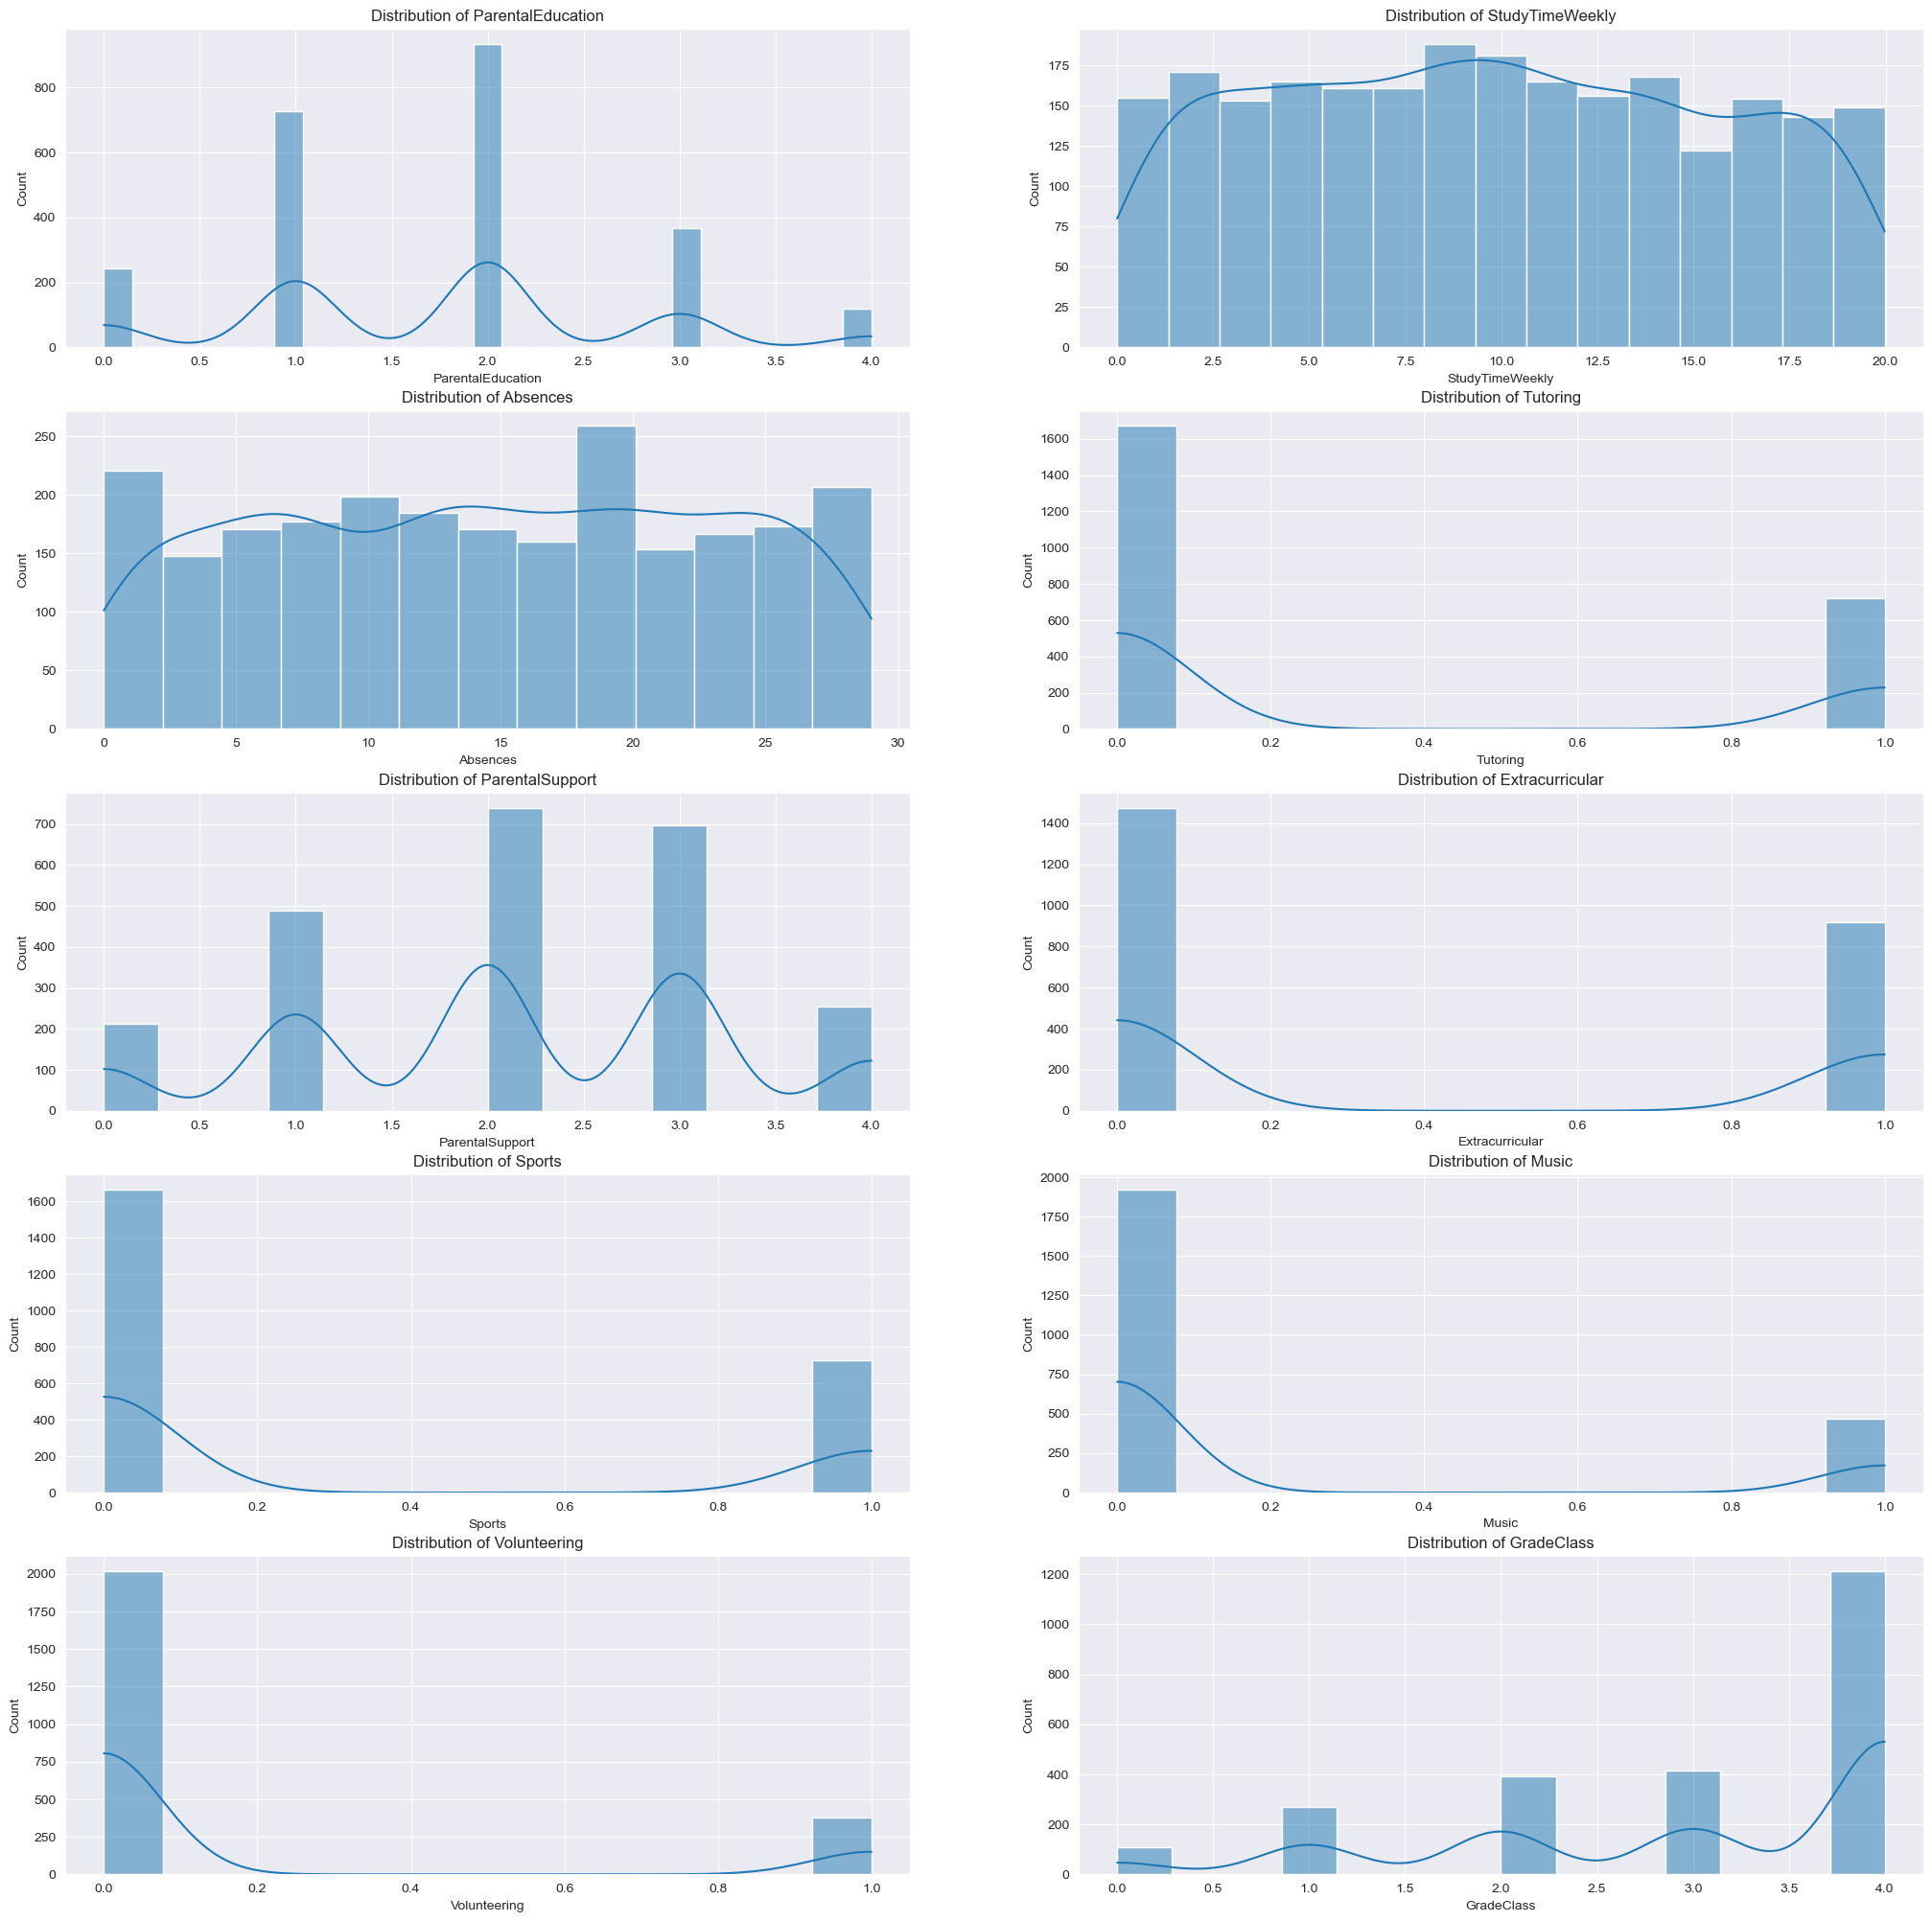

In [19]:
fig, axes = plt.subplots(5, 2, figsize=(25, 25)) #sets a 4,3 figure, smaller as now we have less columns to worry about 
axes = axes.flatten()# reformats the axes to be in a list, making them iteratable in code
print(axes)

i=0

#creates histoplots to display counts of each of the update feature columns
#Andrew: comment why you choise histoplots rather than countplot
for column in data.columns:
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title("Distribution of " +str(column))
    i += 1

- We can clearly see that the distribution of GradeClass in bottom right graph is not balanced.
=> We will be using SMOTE technique later on to rebalance the data

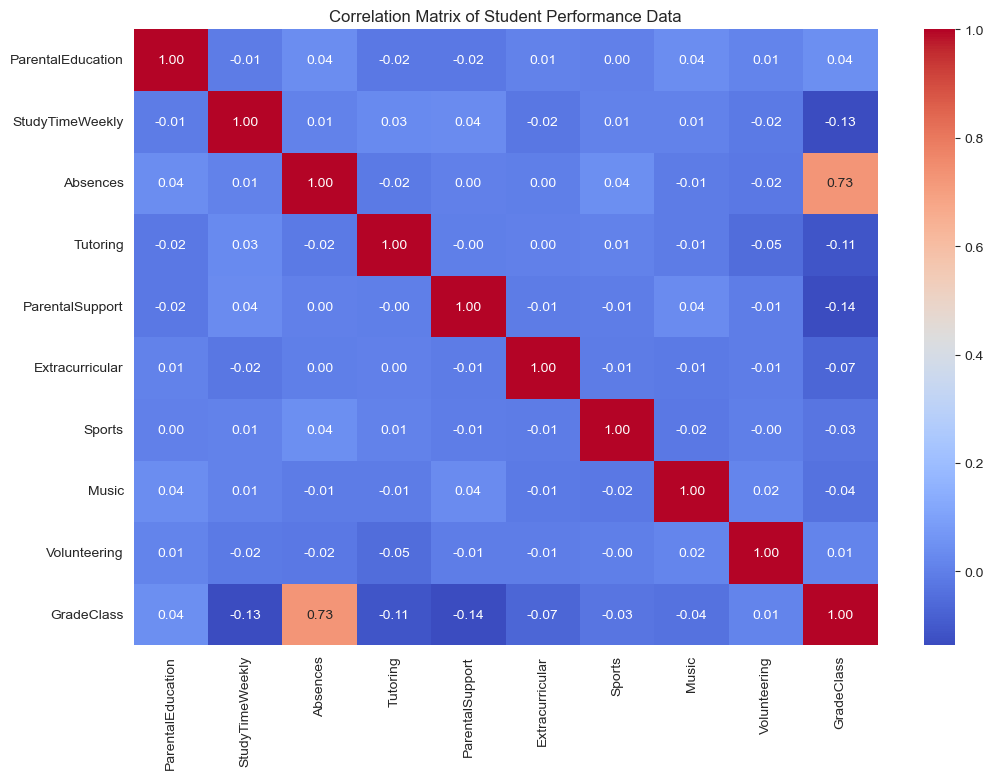

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,19.833723,7,1,2,0,0,1,0,2.0
1,1,15.408756,0,0,1,0,0,0,0,1.0
2,3,4.210570,26,0,2,0,0,0,0,4.0
3,3,10.028829,14,0,3,1,0,0,0,3.0
4,2,4.672495,17,1,3,0,0,0,0,4.0


In [18]:
correlation_matrix = data.corr()#creates another correlation matrix between the remaining feature columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Student Performance Data")
plt.show()  

data.head()

- As seen in the table above, there is quite a lot of variance between scales in the features. The majority of features use a 1 yes or 0 no for its value or a scale between 0 and 4 to describe level of said feature like eg, parental support 4 = high level of support. On the other hand, we have study time weekly and absences which uses a completely different scale than that of the others. In order to avoid any potential imbalances, standardization will be applied to any values that aren't categorical representations: StudyTimeWeekly and Absences.

In [20]:
#converts studytimeweekly and absences into standardized zscore values
data['StudyTimeWeekly'] = stats.zscore(data['StudyTimeWeekly'])
data['Absences'] = stats.zscore(data['Absences'])
#comment this block out to have an easy direct comparison between non-standardized and standardized final model

#print(data['Absences'])
#print(data['StudyTimeWeekly'])

data.head()


,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,1.780336,-0.890822,1,2,0,0,1,0,2.0
1,1,0.997376,-1.717694,0,1,0,0,0,0,1.0
2,3,-0.984045,1.353542,0,2,0,0,0,0,4.0
3,3,0.045445,-0.063951,0,3,1,0,0,0,3.0
4,2,-0.902311,0.290422,1,3,0,0,0,0,4.0


- Now that the redundant columns have been dropped and the data has been standardized, we must focus on rebalancing the data for training, currently as it stands, the grade class distribution is heavily leaning towards lower grades than higher grades.
- Oversampling technique will be used to sample from the classes repeatedly that have been under-represented.

In [22]:
xColumns = [] #assigns empty list to hold all column names of x
for x in data.columns: #for each column in the datas columns
    if x != 'GradeClass': #if the column isn't the target grade class column 
        xColumns.append(x) #add said column to the list of
 
print(xColumns)   
X = data[xColumns].values#takes the values the columns and assigns them to x
y = data['GradeClass'].values #assign the remaining column values of GradeClass as Y
#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splits data into training and testing ensuring it'll always result in the same split that has been the result of state 42.

#could not enter 6 values into the above code so the splitting of train test and val sets had to be split into 2 lines of code. The code below takes the already split training data and splits it again into train and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


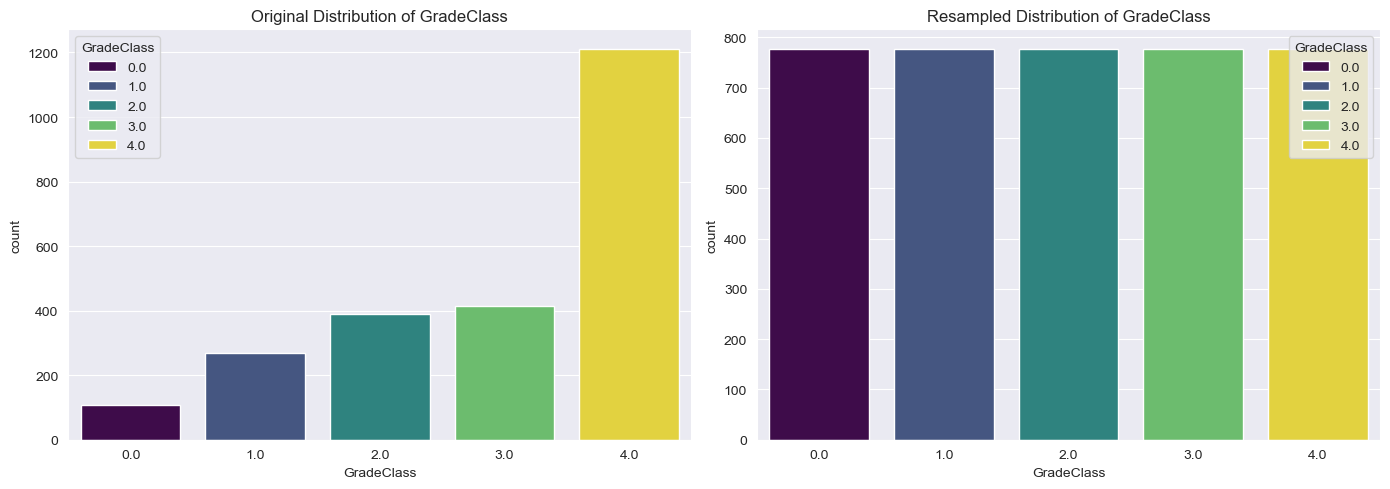

In [23]:
#resamples the data to using consistent state of 42
sm = SMOTE(random_state=42)#initializes the smote function which oversamples data
X_resampled, y_resampled = sm.fit_resample(X_train, y_train) #resamples the data

#create figure canvas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#countplot of regular distribution
sns.countplot(x="GradeClass", data=data, palette="viridis",hue="GradeClass" , ax=axes[0])
axes[0].set_title("Original Distribution of GradeClass")

#converts the resampled data to a dataframe which we can use to create a diagram from
data_resampled = pd.DataFrame(X_resampled, columns=xColumns) #creating a data frame using values X_resampled with original columns
data_resampled['GradeClass'] = y_resampled  #adding a new y column to said dataframe as the target column of GradeClass

#creates countplot from the resampled data
sns.countplot(x="GradeClass", data=data_resampled, palette="viridis", hue="GradeClass", ax=axes[1])
axes[1].set_title("Resampled Distribution of GradeClass")

#display the plots
plt.tight_layout()
plt.show()

As seen with the results above, the data has been successfully resample. Grade 0.0 which had almost no samples compared to other now has an equal amount as the rest

In [24]:
data.info()
data_resampled.info()
data_resampled.head()

#analyse data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  2392 non-null   int64  
 1   StudyTimeWeekly    2392 non-null   float64
 2   Absences           2392 non-null   float64
 3   Tutoring           2392 non-null   int64  
 4   ParentalSupport    2392 non-null   int64  
 5   Extracurricular    2392 non-null   int64  
 6   Sports             2392 non-null   int64  
 7   Music              2392 non-null   int64  
 8   Volunteering       2392 non-null   int64  
 9   GradeClass         2392 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 187.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  3885 non-null   float64
 1   StudyTime

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1.0,0.023774,1.235418,0.0,3.0,1.0,1.0,0.0,0.0,3.0
1,1.0,-0.900779,0.644796,0.0,3.0,0.0,0.0,0.0,1.0,4.0
2,2.0,-0.517851,-0.182076,0.0,0.0,0.0,0.0,1.0,0.0,4.0
3,1.0,1.789543,-1.481445,0.0,3.0,1.0,0.0,0.0,0.0,0.0
4,3.0,0.890770,0.644796,0.0,4.0,0.0,0.0,0.0,0.0,4.0


 - The next step involves creating baseline classifiers. Both random prediction and zero rule will be made as demonstration of our knowledge but the ZeroR baseline classifier will be used for the model accuracy comparison as it is more closely related to the dataset and gives a better reflection of what the baseline accuracy should be.

- First, a test set dataframe is constructed to analyse the information on it

In [25]:
data_test = pd.DataFrame(X_test, columns=xColumns) 
#Creating a data frame using values X_resampled with original columns
data_test['GradeClass'] = y_test  
#Adding a new y column to said dataframe as the target column of GradeClass

data_test.head()
data_test.info()
data_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  479 non-null    float64
 1   StudyTimeWeekly    479 non-null    float64
 2   Absences           479 non-null    float64
 3   Tutoring           479 non-null    float64
 4   ParentalSupport    479 non-null    float64
 5   Extracurricular    479 non-null    float64
 6   Sports             479 non-null    float64
 7   Music              479 non-null    float64
 8   Volunteering       479 non-null    float64
 9   GradeClass         479 non-null    float64
dtypes: float64(10)
memory usage: 37.5 KB


,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,1.674322,0.016596,-0.036331,0.298539,2.048017,0.396660,0.298539,0.192067,0.160752,2.974948
std,1.044205,0.964923,0.991924,0.458095,1.138794,0.489716,0.458095,0.394337,0.367686,1.223634
min,0.000000,-1.728882,-1.717694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-0.806210,-0.890822,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.058625,-0.063951,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,2.000000,0.820712,0.881045,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,4.000000,1.805881,1.707916,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


- From the test data set, we can see that the test set has 479 rows

- First step is to create the random prediction baseline classifier.

In [26]:
GradeClassCount = data_test['GradeClass'].value_counts()
rpbc_output = 0
total = data_test['GradeClass'].count()
for grade in GradeClassCount:
    # print(grade)
    # print(total)
    rpbc_output += ((grade/total)*(grade/total)) 
    #The calculation for random baseline classifier is grade x count (eg 22 A grades)/ total (all grade counts summed), times by itself and summed together, Finally a *100 is performed on it. The
rpbc_output = rpbc_output * 100

 - Second step is to see the most frequent class which is 4.0 with a total count of 237 students. The total of all students within the test set is 479. Therefore, the zero rule baseline classifier accuracy is 273/479 

In [28]:
print(data_test['GradeClass'].value_counts())
print("Total data samples: " +str(data_test['GradeClass'].count()))
accuracy_zeroR = 237/479

print("---------")
print("Random prediction baseline classifier: " +str(rpbc_output))
print("ZeroR baseline classifier: "+str(accuracy_zeroR)) 

GradeClass
4.0    237
3.0     86
2.0     85
1.0     49
0.0     22
Name: count, dtype: int64
Total data samples: 479
---------
Random prediction baseline classifier: 32.11065154004733
ZeroR baseline classifier: 0.49478079331941544


- Using random baseline classifier is ill advised as it doen't produce a baseline as good as zero R. By taking the highest appearing class and dividing it by the total we get a higher baseline classifier value to compare to. Random prediction still included as proof of understanding and research done.

Established the random prediction and zero rule baseline classifiers to compare our performance to later on.
RandomPrediction: 32.11% baseline accuracy
ZeroR: 49.49% Baseline Accuracy

In [35]:
#creating the model

#initialising the model
model = Sequential() 

model.add(Input(shape=(X_resampled.shape[1],)))#creating 9 inputs nodes
model.add(Dropout(0.1))#applying dropout to the model to prevent over training

model.add(Dense(64, kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))#going into layer 1 with 64 nodes, with regularization added on top to further attempt to increase accuracy
model.add(BatchNormalization())#batch normalization applied before activation. Based on observation, applying standardization caused a negative impact on accuracy as opposed to having un-standardized values. With this in account, batch normalization is used as it itself decides when and how to apply normalization based on what it learns is the best for the model.
model.add(LeakyReLU(negative_slope=0.3)) #leaky relu added to prevent saturated and dead neurones from forming.
model.add(Dropout(0.1))#after experimenting with various dropout values, 10% dropout chance gave the best results.

model.add(Dense(32, kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))#going into with 32 nodes
#optimization techniques re-applied
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.3)) 
model.add(Dropout(0.1))

model.add(Dense(64, kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))#going into layer 3 with 64 nodes again
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.3)) 
model.add(Dropout(0.1))

model.add(Dense(5, activation='softmax'))#going into an output layer with the softmax function to transform the output into a list of probabilities for each of the grade classes

#---------------- original un-optimized model: -------------
# model.add(Input(shape=(X_resampled.shape[1],)))#9 inputs nodes
# model.add(Dense(64, activation='relu'))#going into layer 1 with 64 nodes, activation function relu
# model.add(Dense(32, activation='relu'))#going into relu layer 2 with 32 nodes
# model.add(Dense(64, activation='relu'))#going into relu layer 3 with 64 nodes again
# model.add(Dense(5, activation='softmax'))#going into an output layer with the softmax function to transform the output into a list of probabilities for each of the grade classes
#-----------------------------------------------------

#establishes a neural network structure 
#DRAW A DIAGRAM FOR THIS IN THE REPORT

#takes the structure of the model and turns it into a infromational diagram 
#code snippet taken from keras documentation
# keras.utils.plot_model(
#     model,
#     to_file="model4.png",
#     show_shapes=True,
#     show_dtype=True,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=200,
#     show_layer_activations=True,
#     show_trainable=False,
# )

#taken from keras documentation on Adam optimizer
#stochastic gradient descent optimizer, implementing momentum to overcome local minima
optimizer = keras.optimizers.Adam(
    learning_rate=0.001,#edited from 0.001
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,#small bias to prevent the weights from being 0 and turning into dead neurones
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name="adam",
)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])#model is compiled using sparse cross entropy loss as it is intended for multiclass classification tasks that are encoded as integers 0 1 2 rather than one hot encoded as [0,1,0] , softmax used to transform outputs into probabilities
model.summary() #a model summary of structure is given

#defines early stopping to prevent overtraining, taken from official keras documentation
earlyStop = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.01,#1% minimum change needed to occur from the last best epoch
    patience=15,#will continue to train for another 15 epochs of no improvement till it reach a consensus and picks the best weights from those 15 epochs of no change after starting epoch 250
    verbose=1,
    mode="auto",
    baseline=accuracy_zeroR,#sets the baseline for improvement to be over the Zero R baseline accuracy
    restore_best_weights=True,
    start_from_epoch=250,#gives time till minimum 250 epochs to train itself
)

#training the model normally, verbose 2 to show all detail, for 1000 epochs but with early stop implemented with batch sizes of 32
model.fit(X_resampled,y_resampled,validation_data=(X_val, y_val), verbose=2,epochs=1000, batch_size=32, callbacks=[earlyStop])


#training the model on the original non oversampled data with high varience in target class distribution
#model.fit(X_train,y_train,validation_data=(X_val, y_val), verbose=2,epochs=1000, batch_size=32, callbacks=[earlyStop])

#sources: https://keras.io/api/optimizers/adam/
#https://keras.io/api/utils/model_plotting_utils/
#https://keras.io/api/callbacks/early_stopping/
#https://keras.io/api/layers/activation_layers/leaky_relu/
#https://keras.io/api/layers/regularizers/
#https://keras.io/api/layers/regularization_layers/dropout/

TypeError: Unexpected keyword argument passed to optimizer: use_ema

In [ ]:
history = model.fit(
    X_resampled, y_resampled,
    validation_data=(X_val, y_val),
    verbose=2,
    epochs=1000, 
    batch_size=32,
    callbacks=[earlyStop]
)
plt.figure(figsize(10,6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss vs validation loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize(10,6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy vs validation accuracy')
plt.legend()
plt.grid()
plt.show()

The model has now been created. After much much experimentation with hyperparameters. Originally, before any optimization, the model would achieve training accuracies of 96%+ but comparibly very low accuracies of 68%+-. It was clear that it was significantly overfitting. The original model as seen later has a horrendous precision and recall of around 0.2~ for predicting grade 0. After applying l1&l2 regularization, dropout, leaky relu and batch normalisation, the training accuracies had been significanly reduced down to 55%-65% however the actual testing accuracies have significantly risen to over 73%+ with predicting grade 0 ranging between a callback of 0.60-0.80 and a recall of 0.3-0.5 across various tests. 

It is important that the model be able to predict the higher grades more accuractely than its original 20% as miss-predicting high performing students can have negative effects be it academical, personal or emotional.

In [17]:
#outputs the accuracy of the prediction by predicting on test data x against the y test results
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis=1)
score = metrics.accuracy_score(y_test, prediction)


print("Accuracy: " +str(score))
print(" ")

#produces a classification grid, which shows total accuracy as well as precision, recall, f1 score and the total amounts in said class (support). I took this part from Andrews code which is why later down the line you can see my code for manually doing this rather than using classification_report. However in my code, it calculates the accuracy itself of each class.
print("Classification Report:\n", classification_report(y_test, prediction))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.7306889352818372
 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.14      0.23        22
         1.0       0.53      0.37      0.43        49
         2.0       0.58      0.61      0.60        85
         3.0       0.57      0.65      0.61        86
         4.0       0.87      0.93      0.90       237

    accuracy                           0.73       479
   macro avg       0.66      0.54      0.55       479
weighted avg       0.73      0.73      0.72       479



In [18]:
savePath = "."
#model.save(os.path.join(savePath,"NeuralNetworkNonOversampled3.keras"))
#saves the model for later usage with trained weights

Saving the model

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\Unliv\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy of class 0 (normal model) = 0.4090909090909091
Accuracy of class 0 (non-oversampled model) = 0.18181818181818182
Accuracy of class 0 (un-optimized) = 0.22727272727272727
-----------------------------
Accuracy of class 1 (normal model) = 0.3469387755102041
Accuracy of class 1 (non-oversampled model) = 0.7346938775510204
Accuracy of class 1 (un-optimized) = 0.4897959183673469
-----------------------------
Accuracy of class 2 (normal model) = 0.6941176470588235
Accuracy of class 2 (non-oversampled model) = 0.611764705882353
Accuracy of class 2 (un-optimized) = 0.5294117647058824
-----------------------------
Accuracy of class 3 (normal model) = 0.6627906976744186
Accuracy of class 3 (non-oversampled model) = 0.3023255813953488
Accuracy of class 3 (un-optimized) = 0.6162790697674418
-----------------------------
Accuracy of class 4 (normal model) = 0.8776371308016878
Accuracy of class 4 (non-oversampled 

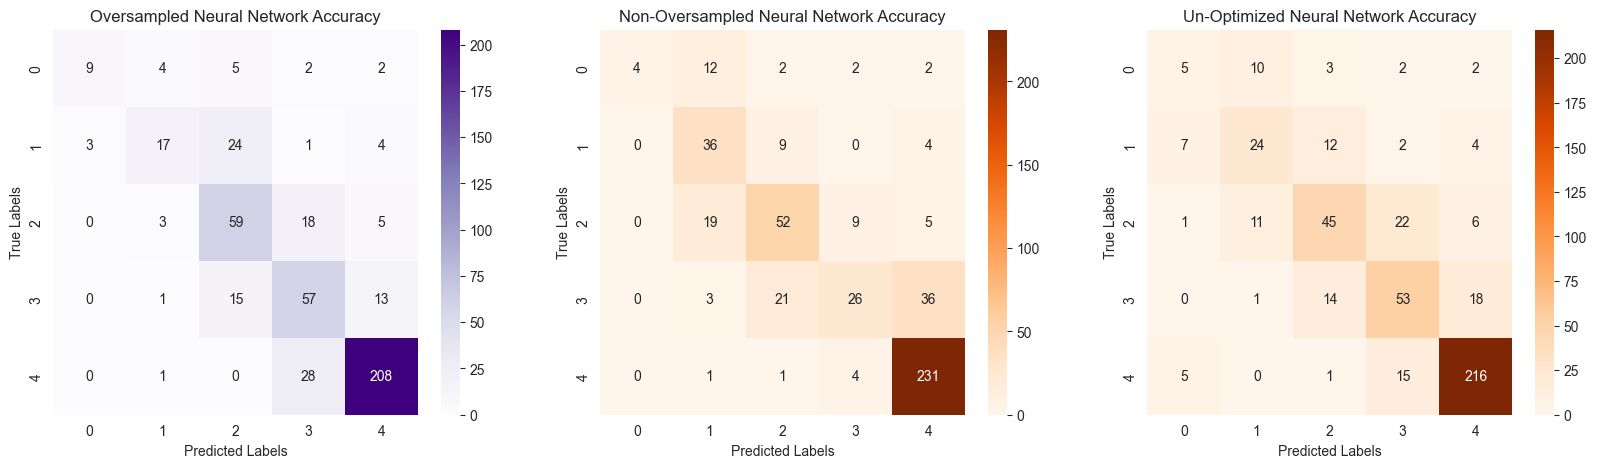

Neural Network Model Accuracy: 0.7306889352818372
 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.41      0.53        22
         1.0       0.65      0.35      0.45        49
         2.0       0.57      0.69      0.63        85
         3.0       0.54      0.66      0.59        86
         4.0       0.90      0.88      0.89       237

    accuracy                           0.73       479
   macro avg       0.68      0.60      0.62       479
weighted avg       0.74      0.73      0.73       479

---------------------------------------------
Neural Network Non-Oversampled Model Accuracy: 0.7286012526096033
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.18      0.31        22
         1.0       0.51      0.73      0.60        49
         2.0       0.61      0.61      0.61        85
         3.0       0.63      0.30      0.41        86
         4.0       0.83     

In [19]:
#code for loading original model without any optimization nor tuning done (no dropout, no leakyrelu, no regularization, no batch normalization)

modelNNOriginal = load_model(os.path.join(savePath, "NeuralNetwork.keras"))#loads model from files
predictionNNOriginal = modelNNOriginal.predict(X_test)#perofmr prediciton using loaded model
predictionNNOriginal = np.argmax(predictionNNOriginal, axis=1)#finds maximum value from each output, in other words the class with the highest probability so the class that the model predicted from the data.
scoreOriginal = metrics.accuracy_score(y_test, predictionNNOriginal)#accuracy of un-optimized trained neural netowrk model

#code for loading model and predicting the result based on the testing set, also calculates the accuracy score for said model

modelNN = load_model(os.path.join(savePath, "NeuralNetwork4.keras"))#loads the most recent saved model which has all the optimization techniques.
predictionNN = modelNN.predict(X_test)#perofmr prediciton using loaded model
predictionNN = np.argmax(predictionNN, axis=1)
score = metrics.accuracy_score(y_test, predictionNN)#accuracy of default trained neural netowrk model

#code for loading the non oversampled model and predicting the result based on the testing set, also calculates the accuracy score for said model
modelNN_NonOversampled = load_model(os.path.join(savePath, "NeuralNetworkNonOversampled3.keras"))
predictionNN_NonOversampled = modelNN_NonOversampled.predict(X_test)
predictionNN_NonOversampled = np.argmax(predictionNN_NonOversampled, axis=1)
scoreNonOversampled = metrics.accuracy_score(y_test, predictionNN_NonOversampled)


#the non-standardized data set has proven to on average have slightly higher accuracy scores however it'll not be used going forward as not standardizing data for neural networks would be bad practice, especially if its only to receive roughly a 3% boost in accuracy. (This was calculated and tested pre optimization techniques)

#the below code finds the accuracy of just the specific class eg. grade A and sees how the non oversampled and oversampled models performed when predicting it

for i in range(0,5):
    desiredClass = i #sets the desired class im looking for, eg. desiredClass = 0 would be to find the accuracy of all the A grades
    desiredResult = np.where(y_test == desiredClass)[0]#selects all the values where y is equal to the class label. eg. where y = 4 (=E grade)
    desiredResultOfModelPrediction = predictionNN[desiredResult]#finds said desired result from the prediction of the model
    desiredResultActual = y_test[desiredResult]#find the desired class of the test
    accuracyOfDesiredClass = accuracy_score(desiredResultActual, desiredResultOfModelPrediction)#compares the accuracy it obtained between predicting the class and what the actual class was

    print("Accuracy of class "+str(desiredClass)+" (normal model) = "+str(accuracyOfDesiredClass))#outputs the accuracy

    #repeats the exact same process but this time for the non-oversampled model
    
    desiredResult = np.where(y_test == desiredClass)[0]#selects all the values where y is equal to the class label. eg. where y = 4 (=E grade)
    desiredResultOfModelPrediction = predictionNN_NonOversampled[desiredResult]#finds said desired result from the prediction of the model
    desiredResultActual = y_test[desiredResult]#find desired result of class fromt test
    accuracyOfDesiredClass = accuracy_score(desiredResultActual, desiredResultOfModelPrediction)#compare accuracies between actual desired result and the prediction

    print("Accuracy of class "+str(desiredClass)+" (non-oversampled model) = "+str(accuracyOfDesiredClass))
    
    #repats the process one final time for the original un-optimized barebones model
    
    #calculates the accuracy of each grade class from original un-optimized model
    desiredClass = i #sets the desired class im looking for, eg. desiredClass = 0 would be to find the accuracy of all the A grades
    desiredResult = np.where(y_test == desiredClass)[0]#selects all the values where y is equal to the class label. eg. where y = 4 (=E grade)
    desiredResultOfModelPrediction = predictionNNOriginal[desiredResult]#finds said desired result from the prediction of the model
    desiredResultActual = y_test[desiredResult]#find the desired class of the test
    accuracyOfDesiredClass = accuracy_score(desiredResultActual, desiredResultOfModelPrediction)#compares the accuracy it obtained between predicting the class and what the actual class was

    print("Accuracy of class "+str(desiredClass)+" (un-optimized) = "+str(accuracyOfDesiredClass))
    print("-----------------------------")
    
#creates confusion matrices of the two different model predictions
cmOversampled = confusion_matrix(y_test, predictionNN)
cmNonOversampled = confusion_matrix(y_test, predictionNN_NonOversampled)
cmOversampledOriginal = confusion_matrix(y_test, predictionNNOriginal)

print("-----------------")

#create a figure for holding 3 side by side graphs 
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#plot oversampled nn heatmap
sns.heatmap(cmOversampled,annot=True,fmt="d",cmap="Purples", cbar=True, ax=axes[0])
axes[0].set_title('Oversampled Neural Network Accuracy')

#plot non oversampled heatmap
sns.heatmap(cmNonOversampled,annot=True,fmt="d",cmap="Oranges", cbar=True, ax=axes[1])
axes[1].set_title('Non-Oversampled Neural Network Accuracy')

sns.heatmap(cmOversampledOriginal,annot=True,fmt="d",cmap="Oranges", cbar=True, ax=axes[2])
axes[2].set_title('Un-Optimized Neural Network Accuracy')

#set labels for each
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")

#show plots
plt.show()

#prints the calculated accuracies of each model, non-standardized not included as it requires the code to be rerun with the zscores commented out therefore it cannot be displayed in the same run as the zscore updated models without overcomplicating the code
print("Neural Network Model Accuracy: " +str(score))
print(" ")
print("Classification Report:\n", classification_report(y_test, predictionNN))
print("---------------------------------------------")

print("Neural Network Non-Oversampled Model Accuracy: " +str(scoreNonOversampled))
print("Classification Report:\n", classification_report(y_test, predictionNN_NonOversampled))
print("---------------------------------------------")

print("Neural Network Un-Optimized Model Accuracy: " +str(scoreOriginal))
print("Classification Report:\n", classification_report(y_test, predictionNNOriginal))
print("---------------------------------------------")

ACCURACIES BY GRADE CLASS:

-The first output presented is the accuracies by each class. As seen above, the optimized model with all the techniques imbued in it managed to get roughly 0.001 more accuracy than both of the other 2 models combined. It easily doubles the performance of the other two when comparing them when it comes to predicting grade A. 40% is still not the greatest both in general and comparing it to the baseline classifier. However, compared to the non-oversampled and un-optimized models this was still a huge success.

-when predicting grade 1, the default NN obtained a substantially lower grade than the the other 2 models. 

- Other than that, class 2 and class 3 had quite a bit higher accuracies compared to the other models, especially the non-oversampled model in class 3 for which the default model had more than double its accuracy performance.

- In terms of grade 4, the optimized model obtained slightly less accuracy than the non-oversampled and un-optimized models however 87.8% is still a good accuracy in general and when compared to the baseline classifier of 49.5% 


ACCURACY

- The overall accuracy of the optimized model was the highest

CLASSIFICATION GRID - https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

- Precision: true positive/true positive + false positive. "the ability of a classifier not to label a negative as a positive" - scikit learn documentation. 
- recall: true positive/ true postive + false negative. "the ability of a classifier to find all positive samples" - scikit learn documentation
- f1score: "harmonic mean" of the two results. Meaning a measure of relativity thats good to compare with other models. It essentially combines the precision and recall into a unified value.
- The oversampled had a perfect precision score while its recall was horrendous at 0.18 which really decreased its f1 score down to 0.3

OVERALL VERDICT

-when it comes to comparison with the baseline classifier, considering the recall = accuracy as depicted by the accuracy of each class having the same result rounded to 2sf as the recall, the final model exceeded the baseline classifier score in total by a significant margin from 49.49% to 73.09% making it a good model in comparison to it. When it comes to individual accuracies by class, Other than grades 0 and 1, the accuracy for obtaining classes 2, 3 and 4 are higher than the baseline accuracy by a fair amount. 

- All in all, other than for class 1, the optimized model had the best or very relatively the same f1-score values (especially for grade 0) compared to the other models which makes it by far the best option to use in terms of best performing model out of the 3 neural network Jakub Wochniak made.

- Future improvements would be to find a way to make sure all of the accuracies are atleast 49.49% or higher and then it can be fully reasonable as to why it is most definitely a good model in all departments.

#---------------------------------
#CREATING THE SVM - Andrew
#--------------------------------

In [36]:
import pickle
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

Now we will be using GridSearchCV to create a settings of parameter for SVM before training. GridSearch will iterate over to find the best combination of parameters for optimal model performance.

- 'C' - Regularization parameter: It controls the trade-off between achieving a low training error and low testing error. In this case we are testing 0.1, 1, 10, 100 respectively. The lower the number the higher regularization strength, the model will aim for a larger margin even if it misclassifies more points. The higher number the model will try to classify all training examples correctly but could indicate overfitiing.

- 'kernel': Specifying the kernel type to be used in the algorithm 'linear': No transformation, suitable for linearly separable data 'rbf': (Radial Basis Function) Handles non-linear relationships by mapping data into higher-dimensional space. 'sigmoid': Similar to a two-layer neural network; can handle non-linear relationships.

- 'gamma': Kernel coefficient for 'rbf', and 'sigmoid' kernels. It defines how far the influence of a single training example reaches. 'scale': Default value; 1 / (n_features * X.var()). Considers feature variance. 'auto': 1 / n_features. Doesn't consider feature variance.

- 'class_weight': Adjusts the weights assigned to classes to handle class imbalance. None: All classes are treated equally. 'balanced': Weights are inversely proportional to class frequencies in the input data, giving more weight to minority classes.

In [46]:
svc = SVC(random_state=42)
#Random state =42 for reproducibility
 
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
#call out the param grid, including 5-fold cross validation to split the data into 5 subsets, the model will be trained on first 4 and validated on the 5t
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy Score (Original Data):", grid_search.best_score_)

with open('best_svm_original.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)
 
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters (Resampled Data):", grid_search.best_params_)
print("Best Cross-Validated Accuracy Score:", grid_search.best_score_)

with open('best_svm_resampled.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Accuracy Score (Original Data): 0.7457516339869281
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (Resampled Data): {'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validated Accuracy Score: 0.8705276705276705


In [39]:
with open('best_svm_original.pkl', 'rb') as file:
    best_model_original = pickle.load(file)
#svm_original = SVC(C=10,kernel='linear',gamma='scale',class_weight=None, random_state=42)
#svm_original.fit(X_train, y_train)
y_pred_original = best_model_original.predict(X_test)

print("Performance on Original Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:\n", classification_report(y_test, y_pred_original))

#sometimes due to the very low amount of grade 0.0 samples, the non resampled svm will lead to a precision of 0% for grade 0

Performance on Original Data:
Accuracy: 0.7390396659707724
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.48      0.61      0.54        49
         2.0       0.62      0.64      0.63        85
         3.0       0.62      0.56      0.59        86
         4.0       0.88      0.94      0.91       237

    accuracy                           0.74       479
   macro avg       0.52      0.55      0.53       479
weighted avg       0.71      0.74      0.72       479



C:\Users\super\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\super\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\super\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- 0.0:
Support: 22 samples.
Precision, Recall, F1-Score: 0.00 across all metrics.
- We indicated the problem which the model is unable to predict class 0.0 at all. This is likely due to class imbalance. With only 22 samples, this class has insufficient representation, making it difficult for the model to learn its features.

- 1.0
- We observed that the recall is higher than precision, which means the model is capturing more true positives but at the cost of false positives. Precision of 0.48 is indicating that the model is not very confident in predicting class 1.0, but it does manage to capture a good portion (61%) of the instances of this class.
Possible Cause: This could be a result of overlapping features with other classes.

- 2.0:
- The model is performing relatively well on class 2.0, with precision and recall being quite balanced. This indicates that the model has learned the features of this class reasonably well, but there is still room for improvement.

- 3.0: Precision is slightly higher than recall. The recall of 0.56 indicates that the model is missing about 44% of instances of class 3.0. It may be that this class has features similar to neighboring classes (2.0 or 4.0), leading to misclassification.

- 4.0: 
- This is the majority class, and the model performs exceptionally well here. Both precision and recall are high, indicating that the model is highly confident in and capable of predicting class 4.0 accurately.


In [40]:
with open('best_svm_resampled.pkl', 'rb') as file:
    best_model_resampled = pickle.load(file)
    
#svm_resampled = SVC(C=100,kernel='rbf',gamma='auto',class_weight=None, random_state=42)
#svm_resampled.fit(X_resampled, y_resampled)
y_pred_resampled = best_model_resampled.predict(X_test)
print("\nPerformance on Resampled Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))


Performance on Resampled Data:
Accuracy: 0.6471816283924844
Classification Report:
               precision    recall  f1-score   support

         0.0       0.20      0.32      0.25        22
         1.0       0.41      0.47      0.44        49
         2.0       0.56      0.59      0.57        85
         3.0       0.51      0.44      0.47        86
         4.0       0.86      0.81      0.83       237

    accuracy                           0.65       479
   macro avg       0.51      0.53      0.51       479
weighted avg       0.67      0.65      0.65       479



- Important observations:
Improvement for Minority Classes (0.0, 1.0)
Decreased Performance for Majority Class (4.0)
Trade-Off Between Accuracy and Balance
- The F1-score for minority classes (0.0, 1.0) is now non-zero, and although lower compared to the majority class (4.0), it indicates an improved ability to detect instances of underrepresented classes.

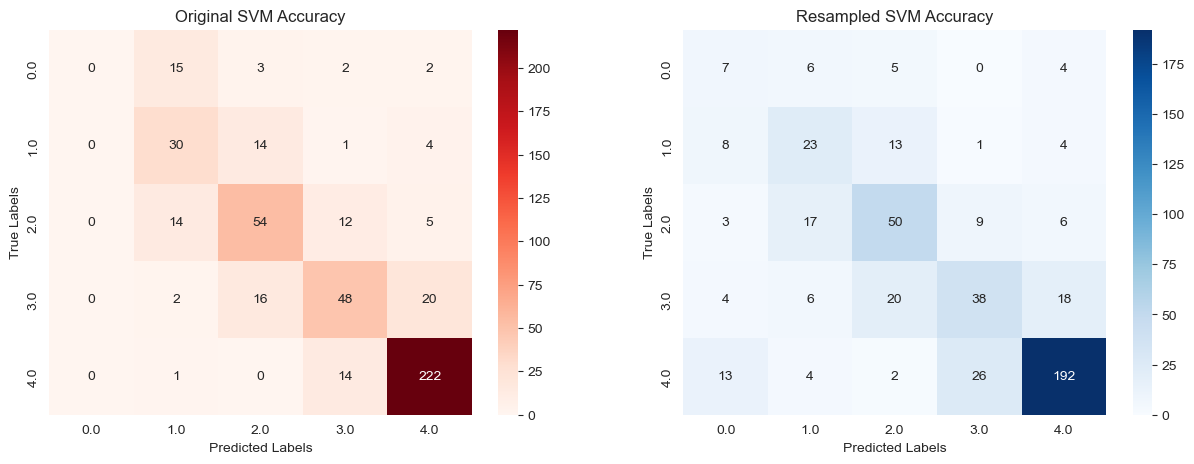

In [50]:
#creates confusion matrices for the svms
cmOriginal = confusion_matrix(y_test, y_pred_original)
cmResampled = confusion_matrix(y_test, y_pred_resampled)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm,annot=True,fmt="d",cmap="viridis", cbar=True,xticklabels=svm_original.classes_,yticklabels=svm_original.classes_,  )
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

figure, axes = plt.subplots(1, 2, figsize=(15, 5))

#original svm heatmap
sns.heatmap(cmOriginal,annot=True,fmt="d",cmap="Reds", cbar=True,xticklabels=best_model_original.classes_,yticklabels=best_model_original.classes_, ax=axes[0] )
axes[0].set_title('Original SVM Accuracy')

#resampled svm heatmap
sns.heatmap(cmResampled,annot=True,fmt="d",cmap="Blues", cbar=True,xticklabels=best_model_resampled.classes_,yticklabels=best_model_resampled.classes_, ax=axes[1] )
axes[1].set_title('Resampled SVM Accuracy')
#sets labels for graphs
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.savefig('Comparison between SVMs Accuracy vs Predicted Labels.png')
plt.show()

NameError: name 'cmOversampled' is not defined

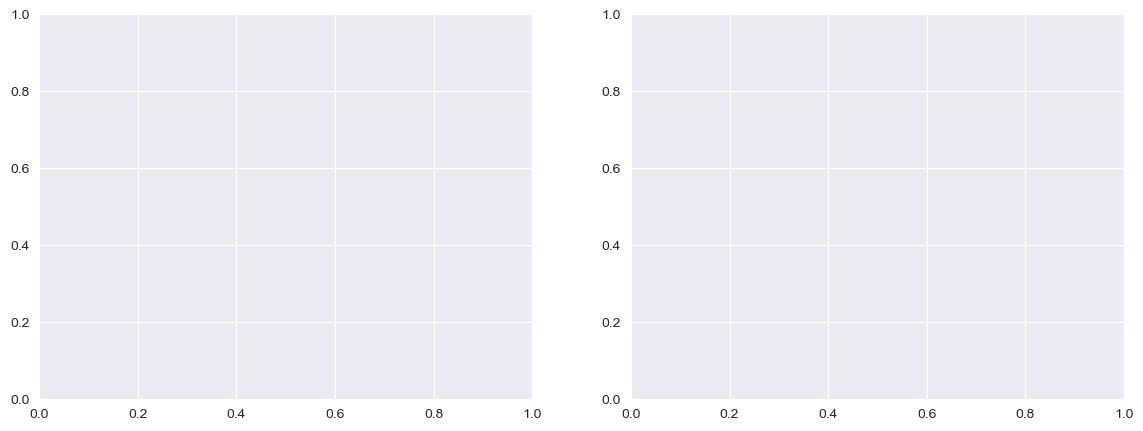

In [45]:
figureCompare, axes = plt.subplots(1, 2, figsize=(14, 5))

#plot heatmap of the main neural network accuracy
sns.heatmap(cmOversampled,annot=True,fmt="d",cmap="Purples", cbar=True, ax=axes[0])
axes[0].set_title('Oversampled Neural Network Accuracy')

#plot heatmap of the main svm
sns.heatmap(cmResampled,annot=True,fmt="d",cmap="Greens", cbar=True,xticklabels=best_model_resampled.classes_,yticklabels=best_model_resampled.classes_, ax=axes[1] )
axes[1].set_title('Default SVM Accuracy')

#set labels
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
#plt.savefig()
plt.show()

#printing classification grids of the two different models
print("Classification Report Neural Network:\n", classification_report(y_test, predictionNN))
print("---------------------------------------------")
print("Classification Report SVM:\n", classification_report(y_test, y_pred_resampled))


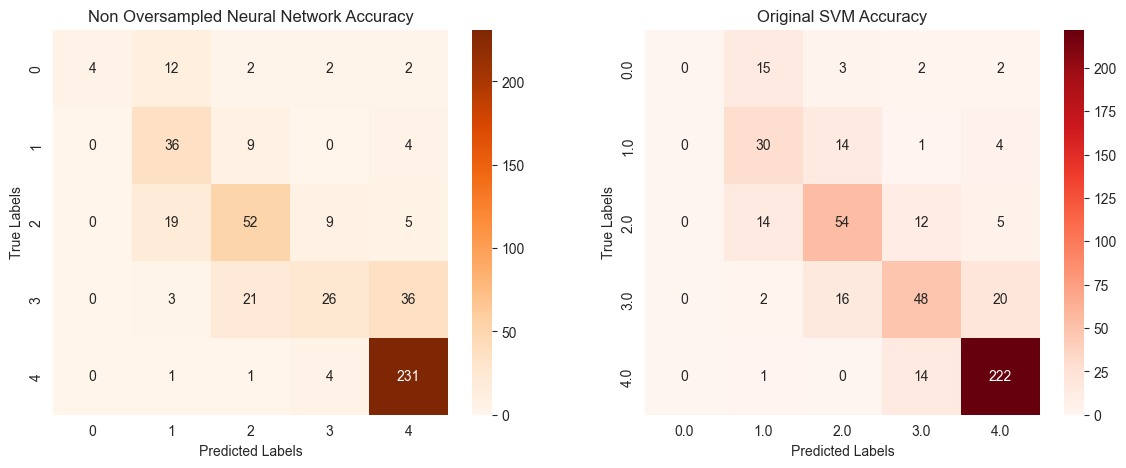

In [27]:
figureCompareNonOversampled, axes = plt.subplots(1, 2, figsize=(14, 5))

#heatmap of non oversampled neural netowrk
sns.heatmap(cmNonOversampled,annot=True,fmt="d",cmap="Oranges", cbar=True, ax=axes[0])
axes[0].set_title('Non Oversampled Neural Network Accuracy')

#heatmap of non oversampled svm
sns.heatmap(cmOriginal,annot=True,fmt="d",cmap="Reds", cbar=True,xticklabels=best_model_original.classes_,yticklabels=best_model_original.classes_, ax=axes[1] )
axes[1].set_title('Original SVM Accuracy')

#labels
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.show()

In [28]:
#compares accuracies between baseline classifier, neural network and svm
print("ZeroR baseline classifier: "+str(accuracy_zeroR))
print("Neural Network Model Accuracy: " +str(score))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_resampled))

ZeroR baseline classifier: 0.49478079331941544
Neural Network Model Accuracy: 0.7306889352818372
SVM Accuracy: 0.6471816283924844


From the above results you can see that both the svm and the neural network outperformed the baseline classifier accuracy, with the neural network obtaining the greatest increase.